<a href="https://www.scinbre.org/learning/bids-tutorials-and-workshops/2025-summer-workshops"><img src="../inbre-header.png" alt="inbre-header" border="0"></a>

### Introduction to Python
### May 23rd, 2025

# First hour: Scatterplots and bar-plots using the HealthExp Dataset

###**About the HealthExp Dataset**

*  **Healthcare spending in USD and life expectancy across countries, between 1970 to 2021.**
* **Open-access dataset**
* **Built into the Python `Seaborn` package**


* Import all required modules



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

* Load the dataset

In [ ]:
healthexp = sns.load_dataset('healthexp')

* View the top 5 rows of the dataset

In [ ]:
healthexp.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


* Create a subset of the healthexp dataset containing data only between the years 1970 and 1979;


In [ ]:
healthexp_subset = healthexp[(healthexp['Year']< 1980)]

* Use a scatterplot to visualize the relationship between life expectancy and spending.

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

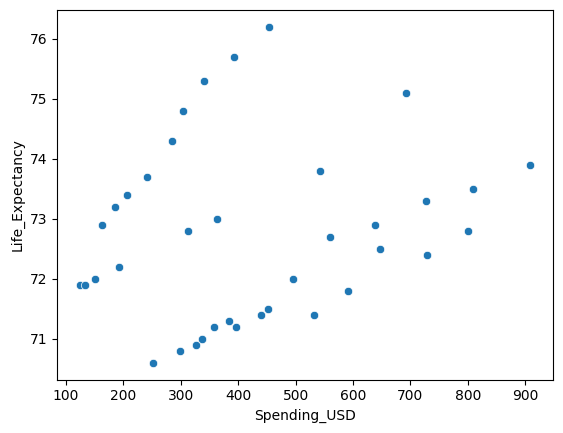

In [ ]:
sns.scatterplot(healthexp_subset, x='Spending_USD', y='Life_Expectancy')

**Interpretation: Positive correlation between life expectancy and spending**


* Visualize the relationship by **country**

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

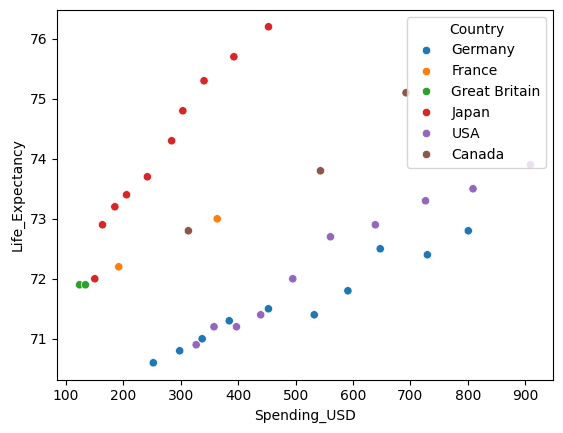

In [ ]:
sns.scatterplot(healthexp_subset, x='Spending_USD', y='Life_Expectancy',hue='Country')

**Interpretation:**
*   **The red dots have the highest slope**
*   **Red corresponds to Japan**
*   **The relation between life expectancy and spending is strongest for Japan**

* Create a column in the healthexp dataset for decade - this rounds of each year from 1970 to 2021 into its associated decade. Eg:
  * The years 1970-79 fall under the decade 1970
  * The years 1980-89 fall under the decade 1980
  
  ..etc.

In [ ]:
healthexp["decade"] = np.round(healthexp['Year'], -1)

In [ ]:
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy,decade
0,1970,Germany,252.311,70.6,1970
1,1970,France,192.143,72.2,1970
2,1970,Great Britain,123.993,71.9,1970
3,1970,Japan,150.437,72.0,1970
4,1970,USA,326.961,70.9,1970


In [ ]:
healthexp['decade'].unique()

array([1970, 1980, 1990, 2000, 2010, 2020])

* Create a 6-paneled figure, one for each decade
* Each figure will show a scatterplot of Spending_USD vs Life Expectance, by country, for that decade

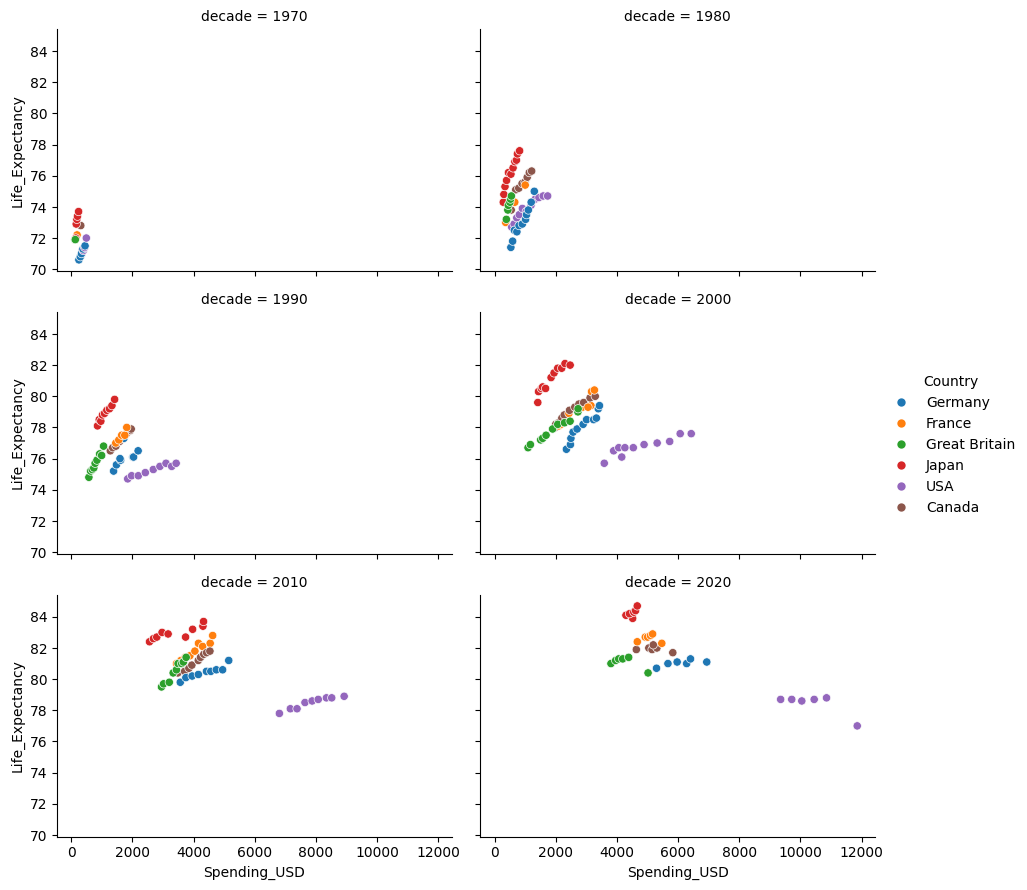

In [ ]:
sns.relplot(data=healthexp,x='Spending_USD', y='Life_Expectancy', col='decade',kind='scatter',hue='Country',col_wrap=2,height=3,aspect=1.5)

* Create a subset of the DataFrame that only contains data for the year 1970



In [ ]:
health_exp_1970 = healthexp[healthexp['Year']==1970]

In [ ]:
health_exp_1970.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


* Use a bar chart to visualize spending across countries.

<Axes: xlabel='Country', ylabel='Spending_USD'>

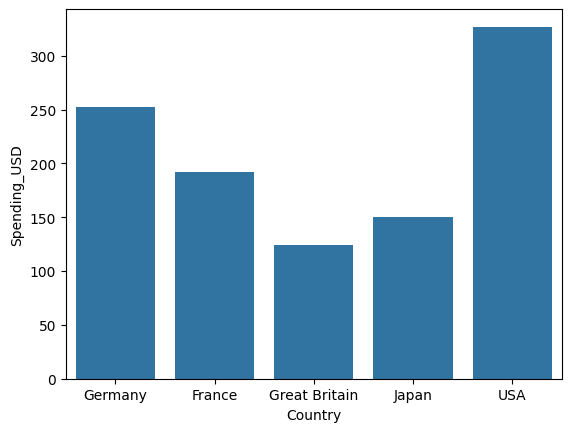

In [ ]:
sns.barplot(health_exp_1970, x='Country',y='Spending_USD')

**Interpretation:The US spent the most on healthcare compared to other countries.**

* Compare spending across countries in 1970 vs 1980

In [ ]:
healthexp_1970_80 = healthexp[(healthexp['Year']==1970) | (healthexp['Year']==1980)]

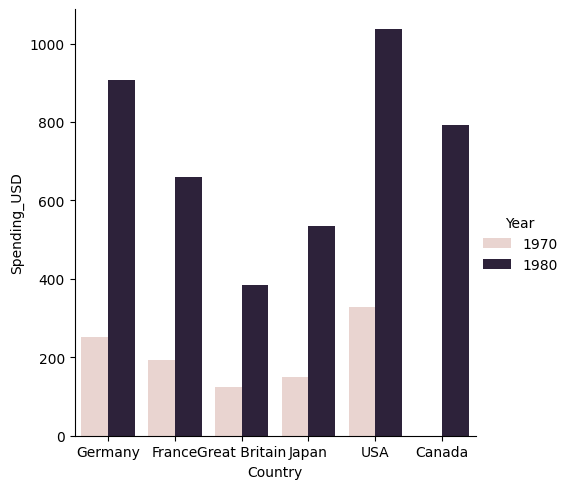

In [ ]:
sns.catplot(healthexp_1970_80,kind='bar',x='Country',y='Spending_USD',hue='Year')

**Interpretation:**
* **Spending increased for all countries from 1970 to 1980.**
* **For Canada, there is no blue bar because there is no spending data for 1970.**
* **The USA remained the country with the highest spending in 1980, like in 1970.**


## Exercises

###**About the 'exercise' dataset:**

* **Data from 89 individuals**
* **Randomly assigned based on three criteria:**
  * **Diet:**
      * low-fat
      * no-fat
  * **Kind of exercise:**
      * rest
      * walking
      * running
  * **Time:**
      * 1 min
      * 15 min
      * 30 mins






* Load the dataset using this command:

`exercise = sns.load_dataset('exercise')`

In [ ]:
exercise = sns.load_dataset('exercise')

* View the first five rows of the dataset using:

` exercise.head() `

In [ ]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


* Use this line to view the three values for the column 'kind' - (this refers to the kind of exercise)

`exercise['kind'].unique()`

In [ ]:
exercise['kind'].unique()

['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']

* Use this line to view the three values for the column 'diet'

`exercise['diet'].unique()`

* Create a subset of the exercise dataset for the 'low fat' diet, 'walking' exercise group

In [ ]:
exercise_walking = exercise[(exercise['kind']=='walking')&(exercise['diet']=='low fat')]

* Use a barplot to visualize the mean pulse at different time points, in this group

<Axes: xlabel='time', ylabel='pulse'>

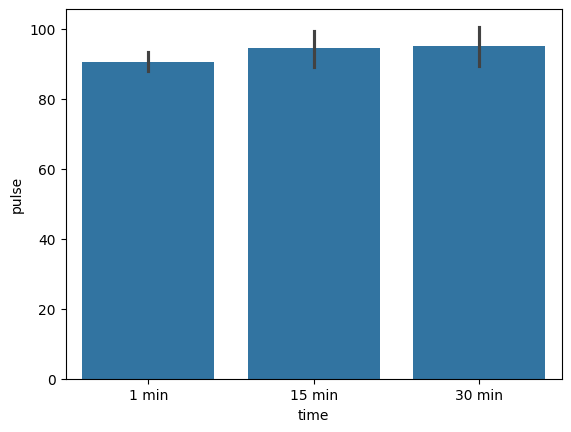

In [ ]:
sns.barplot(exercise_walking, x='time', y='pulse')

* **BONUS Exercise: Line Plot**

Now visualize the relation between pulse and time, across the two different diets. Use this line:

`sns.relplot(data=exercise,x='time', y='pulse', col='diet',kind='line',hue='kind',col_wrap=2,height=3,aspect=1.5)`

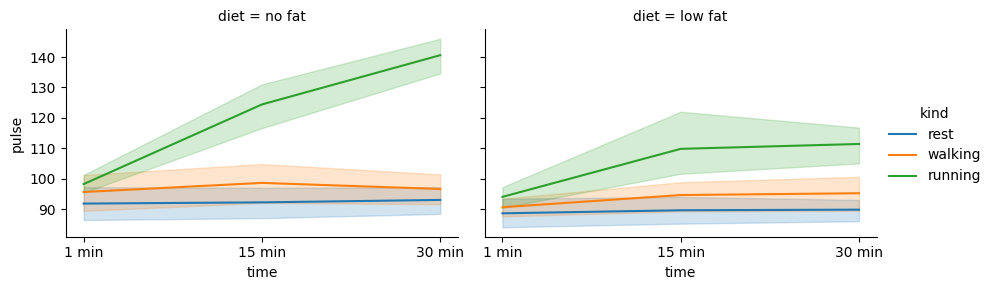

In [ ]:
sns.relplot(data=exercise,x='time', y='pulse', col='diet',kind='line',hue='kind',col_wrap=2,height=3,aspect=1.5)

# Second hour: Heat maps using the LTEE dataset

**About the dataset:**

*  **The long-term evolution experiment (LTEE)**
*  **Tracks genetic changes (mutations) through generations of *Escherichia Coli* bacteria since 1988.**
*  **Heat maps are useful for finding patterns in large datasets.**
*  **We will visualize patterns in the number of mutations over generations of the 12 E.Coli populations, using heatmaps.**

* Load the 'ltee_mutations.csv' dataset

In [ ]:
ltee_dataset = pd.read_csv('https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0607_matplotlib_seaborn/ltee_mutations.csv')

2. View the top five rows of the dataset

In [ ]:
ltee_dataset.head()

,Population,Strain ID,Generation,Total Mutations,Base Substitutions,IS Element Insertions,Small Indels,Large Deletions,Large Duplications,Total Deleted Base Pairs,Total Inserted Base Pairs,Estimated Final Genome Size,Synonymous Base Substitutions,Nonsynonymous Base Substitutions,Nonsense Base Substitutions,Pseudogene Base Substitutions,Noncoding RNA Base Substitutions,Intergenic Base Substitutions
0,Ara+1,REL768A,500,4,3,0,0,1,0,6244,0,4623568,0,2,0,0,0,1
1,Ara+1,REL768B,500,3,1,1,0,1,0,4772,1349,4626389,0,1,0,0,0,0
2,Ara+1,REL958A,1000,4,2,0,1,1,0,2544,0,4627268,0,2,0,0,0,0
3,Ara+1,REL958B,1000,2,1,1,0,0,0,0,1446,4631258,0,1,0,0,0,0
4,Ara+1,REL1062A,1500,7,5,0,0,2,0,6305,0,4623507,0,4,0,0,0,1


* Create a subset with just the three columns with relevant variables to visualize:
  * Population
  * Generation
  * Total mutations

In [ ]:
ltee_subset = ltee_dataset[['Population','Generation','Total Mutations']]

* View the first five rows of the dataset - this is currently in LONG format

In [ ]:
ltee_subset.head()

,Population,Generation,Total Mutations
0,Ara+1,500,4
1,Ara+1,500,3
2,Ara+1,1000,4
3,Ara+1,1000,2
4,Ara+1,1500,7


* Prepare the dataset to be in wide format. Then view the first five rows again.

In [ ]:
ltee_subset_wide = ltee_subset.pivot_table(index='Population',columns='Generation',values='Total Mutations')
ltee_subset_wide.head()

Generation,500,1000,1500,2000,5000,10000,15000,20000,30000,40000,50000
Population,,,,,,,,,,,
Ara+1,3.5,3.0,6.5,8.5,20.5,33.5,47.5,55.0,80.0,94.0,113.0
Ara+2,2.0,4.0,5.5,8.5,11.5,24.0,32.0,35.0,46.5,56.0,67.0
Ara+3,2.5,4.0,6.0,8.5,149.5,353.0,648.5,872.0,1135.5,1534.5,1684.5
Ara+4,2.5,3.0,8.0,6.0,9.5,21.0,27.0,38.0,43.0,54.0,67.5
Ara+5,2.0,4.0,4.5,6.5,13.0,18.5,30.5,32.5,50.5,65.0,76.5


* Create a heatmap of the number of mutations by population and generation.

<Axes: xlabel='Generation', ylabel='Population'>

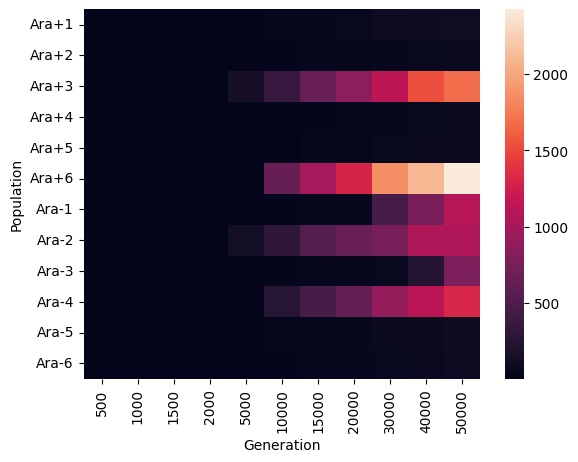

In [ ]:
sns.heatmap(ltee_subset_wide)

**Interpretation**:
* **The left axis shows the different populations of E.Coli bacteria**
* **The bottom axis shows the different generations of each bacteria**
* **The color bar on the right indicates the number of mutations**
* **The Ara+6 population of bacteria shows the greatest number of mutations**

NOTE:


***We can't tell much about the number of mutations in generations 500-5000.***

***We will fix this by converting the mutations to log scale***

* Plot the heatmap again, but with the data converted to log scale

<Axes: xlabel='Generation', ylabel='Population'>

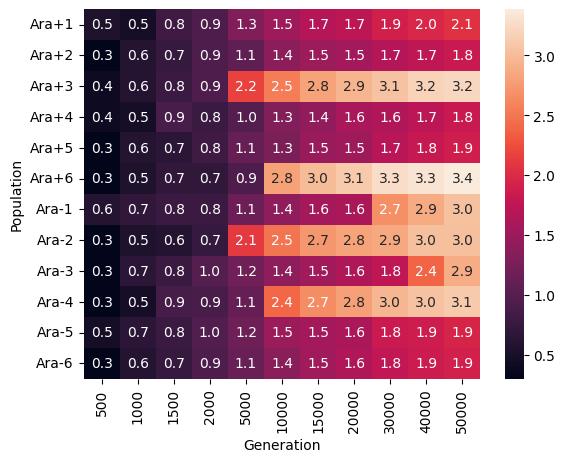

In [ ]:
sns.heatmap(np.log10(ltee_subset_wide), annot=True, fmt=".1f")

## Exercises


* Load the 'ltee_merged.csv' dataset from this link:

https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0607_matplotlib_seaborn/ltee_merged.csv'







In [ ]:
ltee_merged = pd.read_csv('https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0607_matplotlib_seaborn/ltee_merged.csv')

* View the top five rows of the dataset

In [ ]:
ltee_merged.head()

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,...,Estimated Final Genome Size,Synonymous Base Substitutions,Nonsynonymous Base Substitutions,Nonsense Base Substitutions,Pseudogene Base Substitutions,Noncoding RNA Base Substitutions,Intergenic Base Substitutions,Days,Cell size,Relative fitness
0,Ara+1,500,REL768A,NaN,This study,Genoscope,SRR2584408,single,36,70.241277,...,4623568,0,2,0,0,0,1,75.0,0.480,1.1565
1,Ara+1,500,REL768B,NaN,This study,Genoscope,SRR2584409,single,36,41.136778,...,4626389,0,1,0,0,0,0,75.0,0.480,1.1565
2,Ara+1,1000,REL958A,NaN,This study,Genoscope,SRR2584410,single,36,33.226052,...,4627268,0,2,0,0,0,0,150.0,0.495,1.1251
3,Ara+1,1000,REL958B,NaN,This study,Genoscope,SRR2584411,single,36,34.589932,...,4631258,0,1,0,0,0,0,150.0,0.495,1.1251
4,Ara+1,1500,REL1062A,NaN,This study,Genoscope,SRR2584438,single,36,40.342099,...,4623507,0,4,0,0,0,1,225.0,NaN,1.2194


* Create a subset with just the three columns with relevant variables to visualize:
  * Population
  * Generation
  * Sequencing depth


In [ ]:
ltee_merged_subset = ltee_merged[['Population','Generation','Sequencing Depth']]

* Prepare the dataset to be in a wide format.

In [ ]:
ltee_merged_subset_wide = ltee_merged_subset.pivot_table(index='Population',columns='Generation',values='Sequencing Depth')

* Create a heatmap of sequencing depth by population and generation, converted to logarithmic scale.

In [ ]:
sns.heatmap(np.log10(ltee_merged_subset_wide), annot=True, fmt=".1f")

# Homework

* Kaggle is a great resource to find open-access datasets and tutorials
* Create a new Colab notebook by clicking File --> New Notebook in Drive
* Follow and work through the code in [this Kaggle tutorial](https://www.kaggle.com/code/jchen2186/data-visualization-with-python-seaborn/notebook)
* The dataset may be accessed as follows:
  * Click on 'Input' at the top of the tutorial page
  * Scroll down the list of files on the right until you find 'mental-health-in-tech-2016_20161114.csv'
  * Download this file to your local system.
  * To upload a file from your local system to Colab, you can use:
    ```python
      from google.colab import files
      files.upload()
    ```

# Resources used to create this tutorial:

*   Example/tutorial: Data visualization on Seaborn 1: https://seaborn.pydata.org/examples/grouped_barplot.html
*   Example/tutorial: Data visualization on Seaborn 2: https://www.geeksforgeeks.org/data-visualization-with-seaborn-line-plot/
*   Example/tutorial: Visualizations using the LTEE dataset: https://github.com/melbournebioinformatics/data_tidying_and_visualisation/blob/master/Seaborn_Matplotlib.ipynb
*   Example/tutorial: Visualizations using the HBR_UHR genetics dataset: https://bioinformatics.ccr.cancer.gov/docs/pies-2023/pies_lesson4/,
*   Example/tutorial: Visualizations using the mental health dataset: https://www.kaggle.com/code/jchen2186/data-visualization-with-python-seaborn
*   Example/tutorial: Clustermap using a gene expression dataset: https://www.youtube.com/watch?v=kJbxoyLZGwg&t=757s
*  Background on sequencing depth: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-3164-z



# Additional resources

##A free reference book

A few cool things about this book:
- It is available in print for not much; [it is available online for free](https://jakevdp.github.io/PythonDataScienceHandbook/).
- It has been written using notebooks!
- It gives a very good introduction to NumPy, Pandas, Matplotlib, and Scikit-Learn.

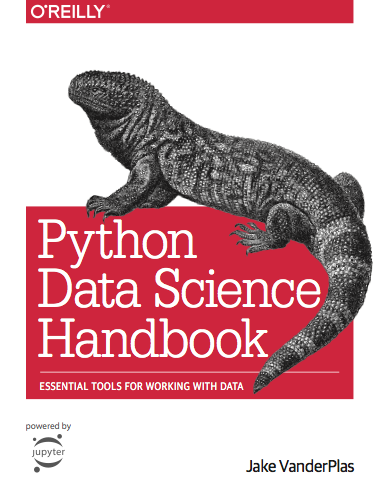

##Additional chart types

[Click here for examples of the types of plots that Matplotlib supports](https://matplotlib.org/stable/plot_types/index.html)

[Click here for examples of the types of plots that Seaborn supports](https://seaborn.pydata.org/examples/index.html)

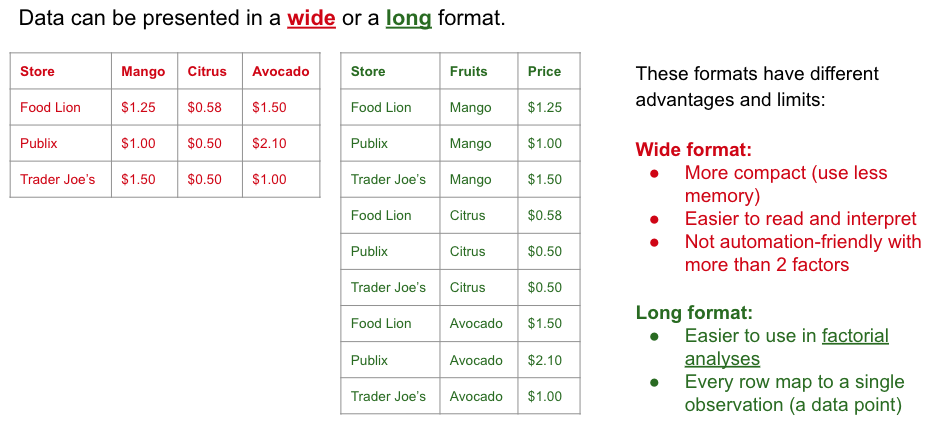